# Решение методами Эйлера и Рунге-Кутты 4-го порядка:

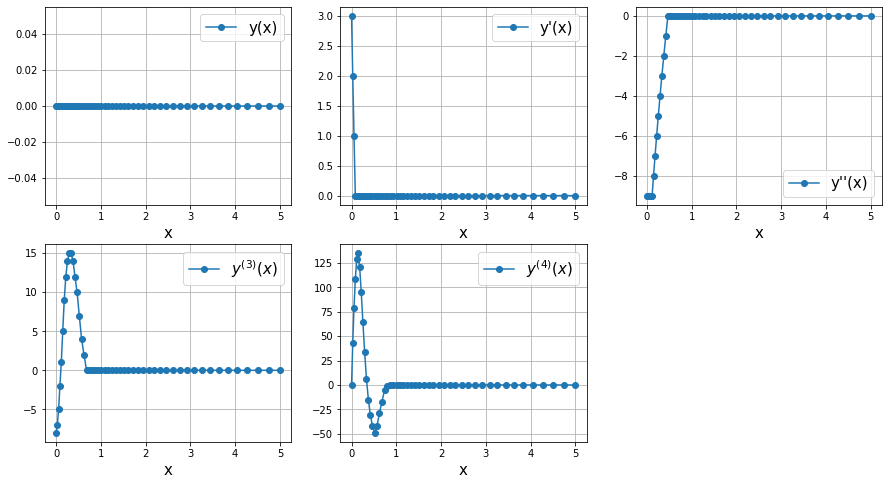

In [77]:
import numpy as np
import matplotlib.pyplot as plt


class DiffEqSolve():
    
    
    '''class for numerical solving a Cauchy problem for a homogeneous differential equation:
        
           /
           |  d^5(y) / d(x)^5 + 15 * d^4(y) / d(x)^4 + 90 * d^3(y) / d(x)^3 +
           |     + 270 * d^2(y) / d(x)^2 + 405 * dy / dx + 243 * y = 0,
           | 
           |  y(0) = 0,
          <| (dy / dx)(0) = 3,
           | (d^2(y) / d(x)^2)(0) = -9,
           | (d^3(y) / d(x)^3)(0) = -8,
           | (d^4(y) / d(x)^4)(0) = 0,
           | 
           | x from 0 to 5.
           \
           
        '''
    
    
    def __init__(self,
                 deg = 5,
                 coef_arr = [243, 405, 270, 90, 15, 1], 
                 init_cond_arr = [0, 3, -9, -8, 0], 
                 interval = [0, 5]):
        
        if coef_arr[-1] != 1:
            norm = coef_arr[-1]
            coef_arr = [coef/norm for coef in coef_arr]
        
        self.deg = deg
        self.coef_arr = coef_arr
        self.init_cond_arr = init_cond_arr
        self.interval = interval
        
        '''As a first, we need to represent our equaion of the deg-th degree
            into a system of simple 1st degree equations:
            
            Let it be:
            
                dy/dx = y_1
                d^2(y)/d(x)^2 = dy_1/dx = y_2
                d^3(y)/d(x)^3 = dy_2/dx = y_3
                d^4(y)/d(x)^4 = dy_3/dx = y_4
                
            Then we have:
                
                d^5(y)/d(x)^5 = dy_4/dx = - (15 * d^4(y) / d(x)^4 + 90 * d^3(y) / d(x)^3 +
                                        + 270 * d^2(y) / d(x)^2 + 405 * dy / dx + 243 * y) =
                                        
                 = -(15 * y_4 + 90 * y_3 + 270 * y_2 + 405 * y_1 + 243 * y) = func_5(y, y_1, y_2, y_3, y_4)
                
            And now we have a system of homogeneous differential equations of 1st degree:
            
                dY/dx = FUNC(Y),
            
            Where:
            
                Y = (y, y_1, y_2, y_3, y_4)^T,
                
                FUNC(Y) = (func_1, func_2, func_3, func_4, func_5)^T = 
                = (y_1, y_2, y_3, y_4, -(15 * y_4 + 90 * y_3 + 270 * y_2 + 405 * y_1 + 243 * y))^T
                   
                '''
        
        def func(self, y_arr):
            
            '''FUNC from previous comment:
            
                y_arr = [y, y_1, y_2, y_3, y_4] in a certain node x '''
            
            res = y_arr[1:]
            res = np.append(res, [0])
            
            for i in range(self.deg):
                res[self.deg - 1] -= y_arr[i] * coef_arr[i]
            
            return res
        
        self.func = func
        
        
    def func_test(self, y_arr):
        return self.func(self, y_arr)
        
        
    def euler_solve_lin_step(self, nodes_num = int(1e2) + 1):
        
        '''Euler's method.
           
           nodes_num: int - number of nodes in the grid,
           h: float - step of the the x_grid_arr,
           y_grid_arr = [Y(0), Y(0 + h), ...] =
               = [[y(0), y_1(0), y_2(0), y_3(0), y_4(0)], ... , [...]] 
                - array of values of each variable in each node of the x_grid_arr
        '''
        
        x_grid_arr = np.linspace(self.interval[0], self.interval[1], nodes_num)
        h = x_grid_arr[1] - x_grid_arr[0]
        
        y_grid_arr = np.array([[0 for i in range(self.deg)] for j in range(nodes_num)])
        y_grid_arr[0] = self.init_cond_arr
        
        for i in range(1, nodes_num):
            y_grid_arr[i] = y_grid_arr[i - 1] + h * self.func(self, y_grid_arr[i - 1])
        
        return x_grid_arr, y_grid_arr
    
    
    def runge_solve(self, nodes_num = int(1e2) + 1, grid_type = 'lin'):
        
        '''Runge-Kutta's method of 4-th degree.
            
            nodes_num: int - number of nodes in the grid,
            grid_type: ('linear', 'log') - type of the grid,
            h: float - step of the the x_grid_arr,
            y_grid_arr = [Y(0), Y(0 + h), ...] =
               = [[y(0), y_1(0), y_2(0), y_3(0), y_4(0)], ... , [...]] 
                - array of values of each variable in each node of the x_grid_arr
        '''
        
        if grid_type == 'lin':
            x_grid_arr = np.linspace(self.interval[0], self.interval[1], nodes_num)
            
        if grid_type == 'log':
            x_grid_arr = (np.logspace(0, 1, nodes_num) - 1) * 5 / 9
            
        y_grid_arr = np.array([[0 for i in range(self.deg)] for j in range(nodes_num)])
        y_grid_arr[0] = self.init_cond_arr
        
        for i in range(1, nodes_num):
            
            h = x_grid_arr[i] - x_grid_arr[i - 1]

            k_1_arr = self.func(self, y_grid_arr[i - 1])
            k_2_arr = self.func(self, y_grid_arr[i - 1] + (h / 2) * k_1_arr)
            k_3_arr = self.func(self, y_grid_arr[i - 1] + (h / 2) * k_2_arr)
            k_4_arr = self.func(self, y_grid_arr[i - 1] + h * k_3_arr)

            y_grid_arr[i] = y_grid_arr[i - 1] + (h / 6) * (k_1_arr + 2 * k_2_arr + 2 * k_3_arr + k_4_arr)
        
        return x_grid_arr, y_grid_arr
    
    
    
#----     
eq = DiffEqSolve()
#x, y = eq.runge_solve() # Решение методом Эйлера с линейным шагом
x, y = eq.runge_solve(nodes_num = 50, grid_type = 'log') # Решение методом Рунге-Кутты с логарифмированным шагом

fig = plt.subplots(figsize = (15, 8))
for i, legend in enumerate(["y(x)", "y'(x)", "y''(x)", "$y^{(3)}(x)$", "$y^{(4)}(x)$"]):
    
    plt.subplot(2, 3, i + 1)
    plt.plot(x, [tmp[i] for tmp in y], "-o", label = legend)
    
    plt.legend(fontsize = 15)
    plt.xlabel("x", fontsize = 15)
    plt.grid()


# Решение с помощью SciPy:

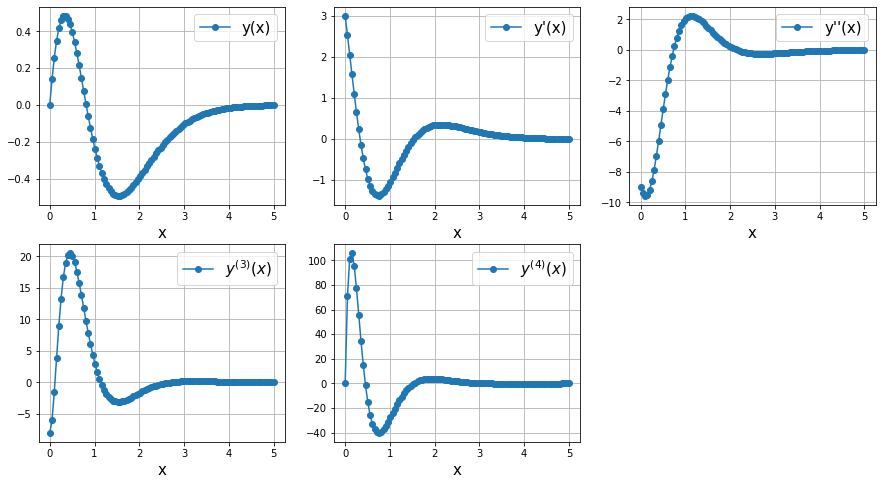

In [78]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(y, t):
    
    # FUNC function from previous step
    
    y_0, y_1, y_2, y_3, y_4 = y
    return [y_1, y_2, y_3, y_4, -(15 * y_4 + 90 * y_3 + 270 * y_2 + 405 * y_1 + 243 * y_0)]

x = np.linspace( 0, 5, 100) # x grid
y0 = [0, 3, -9, -8, 0] # initial conditions
w = odeint(f, y0, x) # solve eq.

fig = plt.subplots(figsize = (15, 8))
plt.title('Решение Scipy')

for i, leg in enumerate(["y(x)", "y'(x)", "y''(x)", "$y^{(3)}(x)$",  "$y^{(4)}(x)$"]):
    
    plt.subplot(2, 3, i + 1)
    plt.plot(x, w[:, i], "-o", label = leg)
    
    plt.legend(fontsize = 15)
    plt.xlabel("x", fontsize = 15)
    plt.grid()

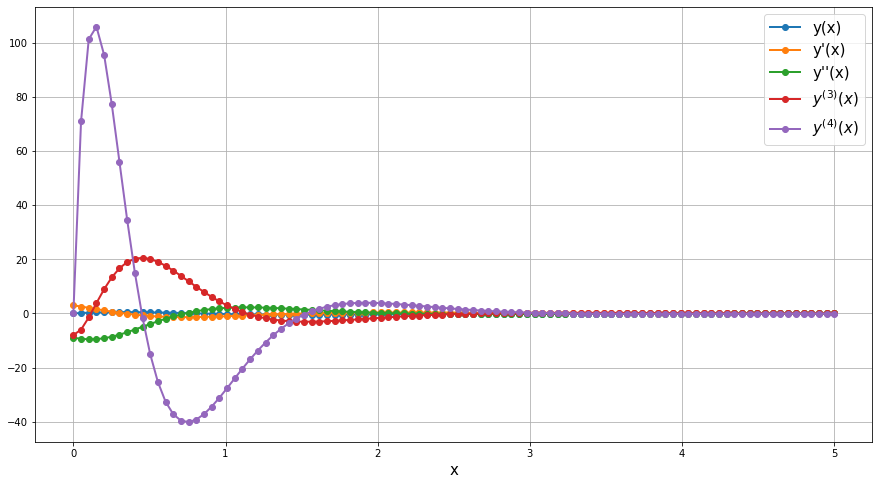

In [5]:
fig = plt.figure(figsize = (15, 8))

plt.plot(x, w[:, 0], '-o',
         x, w[:, 1], '-o',
         x, w[:, 2], '-o',
         x, w[:, 3], '-o',
         x, w[:, 4], '-o', linewidth=2)

plt.legend(["y(x)", "y'(x)", "y''(x)", "$y^{(3)}(x)$",  "$y^{(4)}(x)$"], fontsize = 15)
plt.xlabel("x", fontsize = 15)
plt.grid()
plt.show()